## Merge all prepocessed data to start analysis


In [5]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import necessary libraries
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/2022.05.24_Final-Project_Shared-Folder/classified/reviewed'

# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(path, "*.csv"))
    
# loop over the list of csv files
df_files = (pd.read_csv(f) for f in csv_files)
# concat to one dataframe
df = pd.concat(df_files, ignore_index=True)
# reset the index of final DataFrame
df.reset_index(inplace = True, drop = True)
# drop columns not important for the analysis
df.drop(['Unnamed: 0', 'review', 'classification_title'], axis = 1, inplace = True)

In [38]:
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           262 non-null    object
 1   country         262 non-null    object
 2   summary         262 non-null    object
 3   classification  262 non-null    object
 4   language        262 non-null    object
 5   topic           262 non-null    object
 6   link            262 non-null    object
 7   published_date  262 non-null    object
dtypes: object(8)
memory usage: 16.5+ KB
None


,title,country,summary,classification,language,topic,link,published_date
80,"Tocvan Ventures again with top drill results, ...",DE,Tocvan Ventures continues the series of top dr...,POSITIVE,de,news,https://www.wallstreet-online.de/nachricht/155...,2022-05-26 20:32:00
112,"Gold: $5,000 by the end of the decade",DE,It is something like the Bible of the gold inv...,POSITIVE,de,news,https://www.deraktionaer.de/artikel/gold-rohst...,2022-05-25 8:06:00
136,"Gold stable, gold stocks friendly, NATO on Rus...",DE,Gold prices are improving in yesterday's New Y...,POSITIVE,de,news,http://www.aktiencheck.de/kolumnen/Artikel-Gol...,2022-05-25 9:00:00
23,Why Russian banks get rid of gold?,RU,"Why Russian banks lose gold - RIA News, 02.06....",NEGATIVE,ru,news,https://ria.ru/20220602/zoloto-1792406411.html,2022-06-02 05:00:00
170,"War prices: wheat and gas in decline, oil rais...",IT,Sitting in bending for the gold and the silver...,NEGATIVE,it,news,https://www.larena.it/argomenti/economia/prezz...,2022-05-26 9:55:00


In [37]:
# save dataframe to csv
df.to_csv(f"/content/drive/MyDrive/2022.05.24_Final-Project_Shared-Folder/final_dataset.csv")

## Do some basic analytics

main analysis should be done in Tablou though, to practise that tool as well

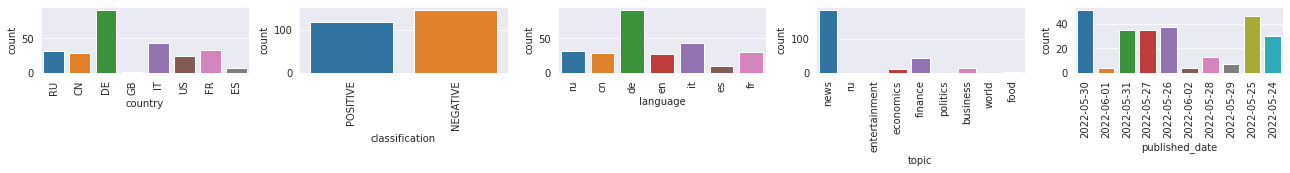

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# exclude some columns first
plot_df = df.drop(['link', 'summary', 'title'], axis = 1)

# trim the publishing date 
#plot_df['published_date'] = pd.to_datetime(df['published_date']).dt.normalize() # this one keeps the time but sets it to 00:00:00
plot_df['published_date'] = pd.to_datetime(plot_df['published_date']).dt.date

fig = plt.figure(figsize=(18,20))
for index in range(len(plot_df.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=plot_df.iloc[:,index], data=plot_df.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)